<a href="https://colab.research.google.com/github/Schauhan21/DIP/blob/main/DIP_PA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function, division   # Python 2/3 compatibility
from skimage import io                            # utilities to read and write images in various formats
import numpy as np  # array manipulation package
import matplotlib.pylab as plt                    # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,15)         # set default figure size
plt.rcParams['image.cmap'] = 'gray'               # set default colormap to gray

# Digital Image Processing - Programming Assignment 

The following progamming assignment involves geometric transformations of images. The deadline for returning your work is **7 April 2022 at 23:59. 
Please, follow carefully the submission instructions given in the end of this notebook.** You are encouraged to seek information in other places than the course book and lecture material but remember **list all your sources under references**.

If you experience problems that you cannot solve using the course material or the Python documentation, or have any questions regarding to the programming assignments, please do not hesitate to contact the course assistant by e-mail at the address dip@unioulu.oulu.fi.

**At first, fill in your personal details below.**

# Personal details:

* **Name(s) and student ID(s):Subam Chauhan(Y69317276)**
* **Contact information:schauhan21@student.oulu.fi**

# Example of curvilinear transformation of an image (parabolic deformation)

Study carefully the following code which illustrates step-by-step how to apply a specific curvilinear transformation to an image. Note that the image transformation is performed by the function `warp2d` contained in the file *custom_warp.py*, which is located in the same folder of this notebook. It is thus important to understand the meaning of the arguments required by that function.

First, we load and display the image `cameraman.tif` on the screen. The image size is $256\times256$ pixels, and usually one assumes a coordinate system where the origin is at the top-corner and the horizontal and vertical coordinates lie within the range $[0,width-1]$ and $[0,height-1]$. However, when dealing with geometric trnasformations, it is often more convenient to define a new coordinate system such that the image lies in the domain $U\times V = [-1,1]\times[-1,1]$. This will have the effect of: _a)_ setting the origin of the coordinate system at the center of the image, _b)_ making the geometric transformation independent from the image size.

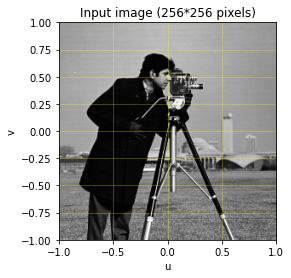

In [ ]:
# Define the domain intervals for horizontal and vertical coordinates (they are parameters required by the function `warp2d`):
ubound, vbound = [-1,1], [-1,1]

# Load and visualize the image:
input_image = io.imread("cameraman.tif")
plt.imshow(input_image, extent=np.ravel([ubound,vbound]))
plt.xlabel('u')
plt.ylabel('v')
plt.grid(color=[1,1,0.2], alpha=0.3)
plt.title(f"Input image ({input_image.shape[1]}*{input_image.shape[0]} pixels)" )
plt.show()

Now suppose that one wants the above image to be transformed according to the _forward transformation_ $\tau:U \times V \longrightarrow X \times Y$ defined as follows:

$\tau:\left\{\begin{matrix}
x(u,v) & = & u\\ 
y(u,v) & = & v + u^2
\end{matrix}\right.$

The procedure to achieve this is to consider a 2D-array of arbitrary size `output_shape` that will accomodate the pixels of the output image, and for each pixel location $(x,y)$ in it, find its corresponding location in the input image by the _inverse transformation_ $\tau^{-1}(x,y)$, and finally assign to $(x,y)$ (in the output image) the intensity of the pixel at $\tau^{-1}(x,y)$ (in the input image). In practice, all this is done internally by `warp2d`, however we must provide the inverse function $\tau^{-1}$. 

In this specific example the _inverse function_ $\tau^{-1}:X \times Y \longrightarrow U \times V$ is easiy obtained by elementary algebra:

$\tau^{-1}:\left\{\begin{matrix}
u(x,y) & = & x\\ 
v(x,y) & = & y - x^2
\end{matrix}\right.$

We can now define the inverse transformation $\tau^{-1}$ in Python code :

In [ ]:
# The inverse function must take as its argument a numpy array of size Nx2, in which each row represents the [x,y] coordinates
# of one of the N points, and it must return an array of the same size containing the transformed [u,v] coordinates
# for each point.

def inverse_map(xy):
    return np.hstack([xy[:,0:1], xy[:,1:2]-xy[:,0:1]**2])

At this point, we must define suitable values for the size of the output image, and for the bounds of its domain intervals $X$ and $Y$. In principle, all the aforementioned values can be assigned arbitrarily, however the bounds of $X$ and $Y$ are typically chosen in such a way that the whole transformed image is visible, and does not appear cropped. This can be done in several ways. Three possibilities are:

_1)_ Manually, by trial and error

_2)_ Manually, by using the forward transformation $\tau$ in order to determine the lower and upper bounds of $x(u,v)$ and $y(u,v)$, when $-1\leq u,v \leq 1$

_3)_ Automatically, by performing in Pyhton code the calculation in point _2)_.

In this example, we choose option _2)_ and we notice that since $x(u,v)=u$ the lower/upper bounds are clearly $[-1,1]$. For $y(u,v)$ it is easy to verify that the lower/upper bounds are reached respectively when $(u,v)=(0,-1)$ and $(u,v)=(1,1)$, and they are $[-1,2]$.

In [ ]:
# Set the bounds for the domain of the output image, as explained above:
xbound, ybound = [-1,1], [-1,2]


We are now ready to invoke the warp function `warp2d` to obtain the transformed output image. Note that the function `warp2d` is essentially a wrapper function of [`skimage.transform.warp`](http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.warp) that accepts domain intervals as its arguments.
The syntax for `warp2d` is the following :
___
*`warp2d`(input_image, inverse_map, ubound=[-1,1], vbound=[-1,1], xbound=[-1,1], ybound=[-1,1], output_shape=None, **kwargs)*

__Returns:__ numpy array of size *output_shape* containing the transformed image.

__Note:__ The keyword arguments contained in _\*\*kwargs_ are the same keyword arguments accepted by [`skimage.transform.warp`](http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.warp). Please, check the documentation for a complete explanation of the parameters. Some of them are useful to specify, for instance, the _padding_ and the _interpolation_ method to be used.
___

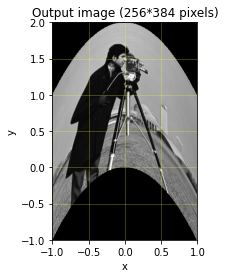

In [ ]:
# Set the size of the output image:
output_shape = [256+128,256]

# Invoke the warp function to perform the transformation (see the above instructions for a detailed explanation of the arguments):
from custom_warp import warp2d
output_image = warp2d(input_image, inverse_map, ubound=ubound, vbound=vbound, xbound=xbound, ybound=ybound, output_shape=output_shape)

# Visualize the result:
plt.imshow(output_image, extent=np.ravel([xbound,ybound]) )
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color=[1,1,0.2], alpha=0.3)
plt.title(f"Output image ({output_image.shape[1]}*{output_image.shape[0]} pixels)" )
plt.show()

# 3. Application of Polar-to-Cartesian curvilinear transformation

Suppose that a sonar mounted on a ship scans the sea floor by sending acoustic impulses at different angles, and recording the intensity of the returned sound. The directions of the sound impulses are such that the sonar is practically sampling the reflectivity of the sea floor on a polar grid. The samples are then stored into a matrix in which the horizontal axis *u* represents the radial coordinate, and the vertical axis *v* represents the angular coordinate. An example of such an image is found in the file `sonar.png` contained in the folder of this notebook.

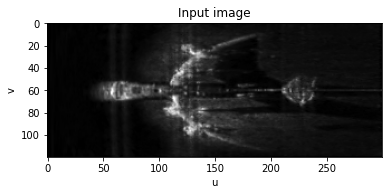

In [ ]:
sonar_input = io.imread('sonar.png')

plt.imshow(sonar_input)
plt.xlabel('u')
plt.ylabel('v')
plt.title(f"Input image" )
plt.show()

The above image actually represents an aircraft relic lying on the sea floor, and its appearance looks distorted, especially on the wings. The distortion is caused by the fact that the pixel intensities were originally sampled on a polar grid, but we are now visualizing the image as if its pixels were sampled on a regular Cartesian grid.
The main goal will be that of eliminating this distortion by completing the following tasks.

**3.1 Suppose the sonar collected samples on a polar grid at radial coordinates ranging from $0$ to $5$ and angular coordinates ranging from $-60$ to $+60$ degrees. Define two variables containing the respective lower and upper bounds for the coordinates $u$ and $v$ (like _ubound_ and _vbound_ in the previous example), and use them to visualize the image in the new coordinate system (hint: use the _extent_ argument of _imshow_ as in the example in Section 1).**

**_Note:_ since numpy trigonometric functions work with radians, it is convenient to express angular coordinates in radians.**

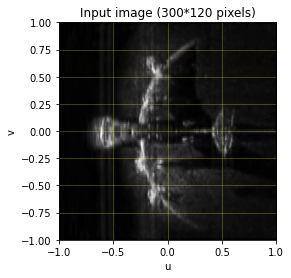

In [ ]:
ubound, vbound = [-1,1], [-1,1]

input_image = io.imread("sonar.png")
plt.imshow(input_image, extent=np.ravel([ubound,vbound]))
plt.xlabel('u')
plt.ylabel('v')
plt.grid(color=[1,1,0.2], alpha=0.3)
plt.title(f"Input image ({input_image.shape[1]}*{input_image.shape[0]} pixels)" )
plt.show()

Recall that the formulas for transforming polar coordinates to Cartesian coordinates are:

$\tau: \left\{\begin{matrix}
x(u,v) & = & u\, \cos(v)\\ 
y(u,v) & = & u\, \sin(v)
\end{matrix}\right.$

Conversely, the Cartesian-to-polar map is given by:

$\tau^{-1}:\left\{\begin{matrix}
u(x,y) & = & \sqrt{x^2+y^2}\\ 
v(x,y) & = & \mathrm{arctan2}\left (y,x \right )
\end{matrix}\right.$

Note that the image _sonar.png_ is defined in the domain $U\times V$. Hence, following the same reasoning as in the example in the previous Section in this assignment, we seek to obtain an output image defined on a Cartesian domain $X \times Y$, whose pixel intensities at $(x,y)$ are given by the pixel intensities of `sonar_input` at locations $\tau^{-1}(x,y)$.  

**3.2 Define a Python function that evaluates $\tau^{-1}$. In other words, you have to define a function that takes a $N\times 2$ numpy array of coordinates \[x,y\] and returns an array of the same size containing the corresponging coordinates \[u,v\].**

In [ ]:
import math
def inverse_sonar(xy):
  return np.hstack( [np.sqrt( [xy[:,0:1]**2 + xy[:,1:2]**2] ) , [np.arctan2(xy[:,1:2], xy[:,0:1])] ])

**3.3 Define suitable lower bounds and upper bounds for the $x$ and $y$ coordinates in the output image, and store them respectively in two variables (like _xbound_ and _ybound_ in the previous example). Please, describe very briefly the method you used to obtain the intervals.**

In [ ]:
x_bound, y_bound = [-0.5,2], [-1,1]

**3.4 Choose a suitable size for the output image, and invoke `warp2d` to obtain the transformed output image. Visualize the result by plotting the image. The aircraft should be completely visible and its wings should appear straight. It should be similar to the corrected image attached along this assignment, titled, `sonar_undistorted.png`.**

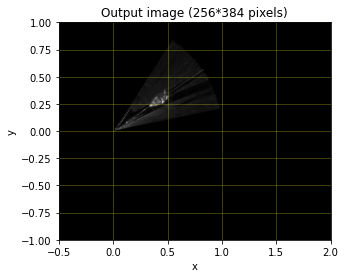

In [ ]:
# Set the size of the output image:
output_shape = [256+128,256]

# Invoke the warp function to perform the transformation (see the above instructions for a detailed explanation of the arguments):
from custom_warp import warp2d
output_image = warp2d(input_image, inverse_sonar, ubound=ubound, vbound=vbound, xbound=x_bound, ybound=y_bound, output_shape=output_shape)

# Visualize the result:
plt.imshow(output_image, extent=np.ravel([x_bound,y_bound]) )
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color=[1,1,0.2], alpha=0.3)
plt.title(f"Output image ({output_image.shape[1]}*{output_image.shape[0]} pixels)" )
plt.show()

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

`Your answer`

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

`Your answer`

# References
`Enter your references here`

# Submission

1. Before submitting your work, **check that your notebook (code) runs from scratch** and reproduces all the requested results by clicking on the menu `Kernel -> Restart & Run All`! Also, check that you have answered all the questions written in **bold**.
2. Clear all outputs and variables, etc. by click on the menu `Kernel -> Restart & Clear Output`. This may (or will) reduce the file size of your deliverable a lot! 
3. Rename this Jupyter notebook to **`DIP_PA2_[student number(s)].ipynb`** (e.g. `DIP_PA2_1234567.ipynb` if solo work or `DIP_PA2_1234567-7654321.ipynb` if pair work) and upload it as your submission to Moodle.